# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [7]:
### odtud už je to Vaše

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import numpy as np
import torch.optim.lr_scheduler as lr_scheduler





# Loading and initial analysis of data

In [5]:
df = pd.read_csv('train.csv')

In [10]:
df.head(3)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7


In [38]:
if df.map(lambda x: 0 <= x <= 255).all().all():
    print("All pixel values are in the range 0 to 255.")
else:
    print("Some pixel values are outside the range of 0 to 255.")


All pixel values are in the range 0 to 255.


In [39]:
if df.isnull().values.any():
    print("There are empty values in the data.")
else:
    print("There are no empty values.")

There are no empty values.


# Data preparation

In [40]:
X = df.drop('label', axis=1)
y = df['label']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print(f"Learning Set Dimensions: {X_train.shape}")
print(f"Dimensions of the validation set: {X_val.shape}")
print(f"Test Set Dimensions: {X_test.shape}")


Learning Set Dimensions: (31500, 1024)
Dimensions of the validation set: (10500, 1024)
Test Set Dimensions: (10500, 1024)


# Data visualization

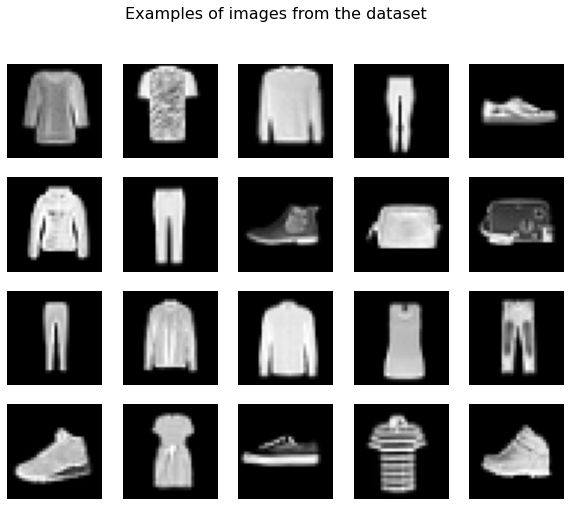

In [41]:
def plot_images(data, rows, cols, title):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 2, rows * 2))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        # Extract each image as a 32x32 array
        img = data.iloc[i].values.reshape(32, 32)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()

sample_images = df.drop('label', axis=1).sample(n=20, random_state=42)

plot_images(sample_images, rows=4, cols=5, title='Examples of images from the dataset')


In [42]:
unique_labels_count = df['label'].nunique()

print(f"Number of unique values in the 'label' attribute: {unique_labels_count}")


Number of unique values in the 'label' attribute: 10


# Creating and training a simple neural network model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(1024,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [18]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)


Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6528 - loss: 0.9632 - val_accuracy: 0.7827 - val_loss: 0.6211
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7809 - loss: 0.6076 - val_accuracy: 0.8022 - val_loss: 0.5557
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8058 - loss: 0.5403 - val_accuracy: 0.8119 - val_loss: 0.5289
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8240 - loss: 0.4886 - val_accuracy: 0.8205 - val_loss: 0.4966
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8293 - loss: 0.4645 - val_accuracy: 0.8138 - val_loss: 0.5071
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8397 - loss: 0.4317 - val_accuracy: 0.8210 - val_loss: 0.4772
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8409 - loss: 0.4167 - val_accuracy: 0.8324 - val_loss: 0.4648
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8521 - loss: 0.3956 - val_accuracy: 0.

In [19]:
# Estimation of the model on a validation sample
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}, Validation Losses: {val_loss:.2f}")


329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.4393
Валидационная точность: 0.84, Валидационные потери: 0.46


# Visualization of learning outcomes

In [43]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Accuracy on the training set')
plt.plot(history.history['val_accuracy'], label='Accuracy on validation set')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Losses on the training set')
plt.plot(history.history['val_loss'], label='Losses on validation set')
plt.title('Losses of the model')
plt.ylabel('Losses')
plt.xlabel('Epoch')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [21]:
from tensorflow.keras.layers import Dropout

# Dropout to prevent overtraining
model = Sequential([
    Input(shape=(1024,)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5734 - loss: 1.1772 - val_accuracy: 0.7423 - val_loss: 0.6969
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7344 - loss: 0.7442 - val_accuracy: 0.7825 - val_loss: 0.5977
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7559 - loss: 0.6691 - val_accuracy: 0.7982 - val_loss: 0.5612
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7685 - loss: 0.6427 - val_accuracy: 0.8018 - val_loss: 0.5470
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7778 - loss: 0.6059 - val_accuracy: 0.8076 - val_loss: 0.5296
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7841 - loss: 0.5917 - val_accuracy: 0.8090 - val_loss: 0.5245
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7947 - loss: 0.5651 - val_accuracy: 0.8185 - val_loss: 0.5051
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7915 - loss: 0.5721 - val_accuracy: 0.

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}, Test Losses: {test_loss:.2f}")


329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8123 - loss: 0.5001
Тестовая точность: 0.82, Тестовые потери: 0.49


# Creating and training a basic convolutional neural network (CNN)


In [13]:
X_train_np = X_train.to_numpy().reshape(-1, 32, 32, 1)  # Shape change for a three-dimensional tensor
X_val_np = X_val.to_numpy().reshape(-1, 32, 32, 1)
X_test_np = X_test.to_numpy().reshape(-1, 32, 32, 1)


In [14]:
X_train_np = X_train_np / 255.0
X_val_np = X_val_np / 255.0
X_test_np = X_test_np / 255.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model_cnn = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    X_train_np, y_train,
    epochs=10,
    validation_data=(X_val_np, y_val)
)


Epoch 1/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.3882 - loss: 1.6663 - val_accuracy: 0.6979 - val_loss: 0.8497
Epoch 2/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6908 - loss: 0.8321 - val_accuracy: 0.7170 - val_loss: 0.7590
Epoch 3/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7143 - loss: 0.7607 - val_accuracy: 0.7350 - val_loss: 0.7014
Epoch 4/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7381 - loss: 0.6967 - val_accuracy: 0.7546 - val_loss: 0.6560
Epoch 5/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7562 - loss: 0.6461 - val_accuracy: 0.7616 - val_loss: 0.6500
Epoch 6/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7659 - loss: 0.6324 - val_accuracy: 0.7720 - val_loss: 0.6262
Epoch 7/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7766 - loss: 0.5914 - val_accuracy: 0.7906 - val_loss: 0.5774
Epoch 8/10
985/985 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7839 - loss: 0.5783 - 

In [26]:

# Pass normalized NumPy arrays instead of original DataFrames
val_loss_cnn, val_accuracy_cnn = model_cnn.evaluate(X_val_np, y_val)
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_np, y_test)

print(f"CNN Validation Accuracy: {val_accuracy_cnn:.2f}, CNNs Validation Losses: {val_loss_cnn:.2f}")
print(f"CNNs Test Accuracy: {test_accuracy_cnn:.2f}, CNNs Test Losses: {test_loss_cnn:.2f}")



329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8033 - loss: 0.5237
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.5391
Валидационная точность CNN: 0.80, Валидационные потери CNN: 0.54
Тестовая точность CNN: 0.80, Тестовые потери CNN: 0.53


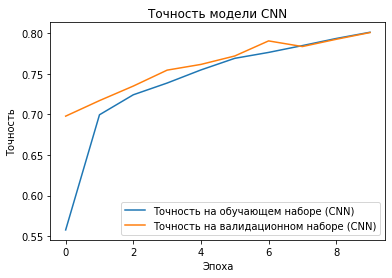

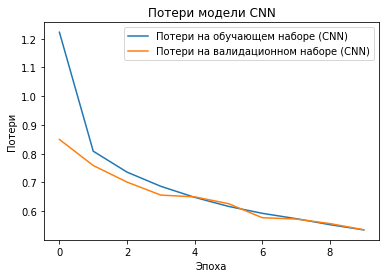

In [27]:
# График точности для CNN
plt.plot(history_cnn.history['accuracy'], label='Accuracy on the training set (CNN)')
plt.plot(history_cnn.history['val_accuracy'], label='Accuracy on validation set (CNN)')
plt.title('Accuracy of CNN model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# График потерь для CNN
plt.plot(history_cnn.history['loss'], label='Losses on the training set (CNN)')
plt.plot(history_cnn.history['val_loss'], label='Losses on validation set (CNN)')
plt.title('CNNs model loss')
plt.ylabel('Losses')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Data Augmentation

To improve the generalizability of the model and to make it better handle the variety of real data, we apply data augmentation. We use ImageDataGenerator from Keras:

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Creating a more complex model (architecture with using Batch Normalization and Dropout):

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Callback clipping gradient
class ClipCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        for var in self.model.trainable_variables:
            tf.clip_by_value(var, -1, 1)


model = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callback for an early stop
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_np, y_train, 
    epochs=50, 
    batch_size=64,
    validation_data=(X_val_np, y_val),
    callbacks=[early_stop, ClipCallback()]
)

val_loss, val_accuracy = model.evaluate(X_val_np, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")



Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - accuracy: 0.6076 - loss: 1.1469 - val_accuracy: 0.1026 - val_loss: 2.8145
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.7914 - loss: 0.5695 - val_accuracy: 0.8403 - val_loss: 0.4386
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.8250 - loss: 0.4789 - val_accuracy: 0.8604 - val_loss: 0.3859
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.8392 - loss: 0.4400 - val_accuracy: 0.8729 - val_loss: 0.3415
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.8513 - loss: 0.4042 - val_accuracy: 0.8635 - val_loss: 0.3638
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.8640 - loss: 0.3787 - val_accuracy: 0.8672 - val_loss: 0.3510
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.8666 - loss: 0.3645 - val_accuracy: 0.8856 - val_loss: 0.3131
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.8724 - loss: 0.3441 - 

In [18]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert numpy arrays to PyTorch tensors, permutation of dimensions and explicit type conversion to float
X_train_torch = torch.tensor(X_train_np, dtype=torch.float).permute(0, 3, 1, 2)
X_val_torch = torch.tensor(X_val_np, dtype=torch.float).permute(0, 3, 1, 2)
X_test_torch = torch.tensor(X_test_np, dtype=torch.float).permute(0, 3, 1, 2)

y_train_torch = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_val_torch = torch.tensor(y_val.to_numpy(), dtype=torch.long)
y_test_torch = torch.tensor(y_test.to_numpy(), dtype=torch.long)


# Create datasets and DataLoaders
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [37]:
# default CNN pytorch

In [19]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.classifier(x)
        return x

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

def train_model(model, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Validation Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}%')

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_model(model, train_loader, val_loader)



Epoch 1, Loss: 0.6212793675083176
Validation Loss: 6.448566662181507, Accuracy: 19.36190476190476%
Epoch 2, Loss: 0.9694749133219341
Validation Loss: 0.6657085048429894, Accuracy: 74.31428571428572%
Epoch 3, Loss: 0.5732008554872586
Validation Loss: 0.5807379039851102, Accuracy: 77.27619047619048%
Epoch 4, Loss: 0.4957298938993508
Validation Loss: 0.4692393057274096, Accuracy: 82.27619047619048%
Epoch 5, Loss: 0.4541511817345996
Validation Loss: 0.44499703961791415, Accuracy: 83.5904761904762%
Epoch 6, Loss: 0.4277315735212446
Validation Loss: 0.45662532584233717, Accuracy: 82.92380952380952%
Epoch 7, Loss: 0.39922193369807385
Validation Loss: 0.3879128652991671, Accuracy: 85.37142857142857%
Epoch 8, Loss: 0.38082272083353075
Validation Loss: 0.39247729019685224, Accuracy: 85.15238095238095%
Epoch 9, Loss: 0.3603398468927244
Validation Loss: 0.381784898223299, Accuracy: 85.83809523809524%
Epoch 10, Loss: 0.3515066964812501
Validation Loss: 0.3943247059529478, Accuracy: 85.3523809523809

# upgraded CNN pytorch

In [23]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256 * 2 * 2)
        x = self.classifier(x)
        return x

def init_weights(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
    elif isinstance(m, nn.BatchNorm2d):
        torch.nn.init.constant_(m.weight, 1)
        torch.nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.constant_(m.bias, 0)

model = CNN().to(device)
model.apply(init_weights)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

def train_model(model, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}%')
        scheduler.step(val_loss)

train_model(model, train_loader, val_loader)


Epoch 1, Train Loss: 0.8189852387619793, Validation Loss: 1.1387335311282765, Accuracy: 55.08571428571429%
Epoch 2, Train Loss: 0.5735343805009888, Validation Loss: 0.48982062393968756, Accuracy: 82.12380952380953%
Epoch 3, Train Loss: 0.43595180151186896, Validation Loss: 0.42995021686409457, Accuracy: 84.4%
Epoch 4, Train Loss: 0.39310875940032713, Validation Loss: 0.3932442054604039, Accuracy: 85.79047619047618%
Epoch 5, Train Loss: 0.3617922881312109, Validation Loss: 0.35156941310022816, Accuracy: 86.64761904761905%
Epoch 6, Train Loss: 0.3301334090938916, Validation Loss: 0.3686844302397786, Accuracy: 86.3047619047619%
Epoch 7, Train Loss: 0.30776033996326685, Validation Loss: 0.33742498204563603, Accuracy: 87.39047619047619%
Epoch 8, Train Loss: 0.28757737895840324, Validation Loss: 0.32551049183715475, Accuracy: 87.88571428571429%
Epoch 9, Train Loss: 0.26586600739138605, Validation Loss: 0.33599020021431375, Accuracy: 87.9047619047619%
Epoch 10, Train Loss: 0.24904538047241148

# upgraded CNN putorch with another optimizer and scheduler

In [27]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 2 * 2, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256 * 2 * 2)
        x = self.classifier(x)
        return x

def init_weights(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
    elif isinstance(m, nn.BatchNorm2d):
        torch.nn.init.constant_(m.weight, 1)
        torch.nn.init.constant_(m.bias, 0)
    elif isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.constant_(m.bias, 0)

model = CNN().to(device)
model.apply(init_weights)


# optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define an optimizer with weight decay for regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

def train_model(model, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}%')
        # scheduler.step(val_loss)
        scheduler.step()

train_model(model, train_loader, val_loader)


Epoch 1, Train Loss: 0.8446350139971921, Validation Loss: 2.590286017186714, Accuracy: 34.36190476190476%
Epoch 2, Train Loss: 0.5753397239451477, Validation Loss: 0.48794894751274226, Accuracy: 81.70476190476191%
Epoch 3, Train Loss: 0.44286641490628703, Validation Loss: 0.4212131586941806, Accuracy: 84.27619047619048%
Epoch 4, Train Loss: 0.38423967291931593, Validation Loss: 0.37140447687019, Accuracy: 86.1047619047619%
Epoch 5, Train Loss: 0.3387366707680433, Validation Loss: 0.3534246978434649, Accuracy: 86.52380952380952%
Epoch 6, Train Loss: 0.3088947247872488, Validation Loss: 0.3260913825847886, Accuracy: 87.86666666666666%
Epoch 7, Train Loss: 0.27715107206156964, Validation Loss: 0.3156703141602603, Accuracy: 88.35238095238095%
Epoch 8, Train Loss: 0.24974323940627716, Validation Loss: 0.3133196984276627, Accuracy: 88.26666666666667%
Epoch 9, Train Loss: 0.22746032780191236, Validation Loss: 0.2946783838398529, Accuracy: 89.00952380952381%
Epoch 10, Train Loss: 0.21378021945

In [33]:

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [34]:
class ComplexFNN(nn.Module):
    def __init__(self):
        super(ComplexFNN, self).__init__()
        self.fc1 = nn.Linear(32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ComplexFNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


In [35]:
def train_model(model, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        
        print(f'Epoch {epoch+1}: Train Loss: {total_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Accuracy: {correct / len(val_loader.dataset)}')

train_model(model, train_loader, val_loader)


Epoch 1: Train Loss: 0.8106512006591348, Validation Loss: 0.6207696808106972, Accuracy: 0.7696190476190476
Epoch 2: Train Loss: 0.5663224043396375, Validation Loss: 0.5885442450191035, Accuracy: 0.7736190476190477
Epoch 3: Train Loss: 0.5020990102092828, Validation Loss: 0.5402762827548113, Accuracy: 0.7931428571428571
Epoch 4: Train Loss: 0.46161993355707515, Validation Loss: 0.5032342657898412, Accuracy: 0.8091428571428572
Epoch 5: Train Loss: 0.4283810460422392, Validation Loss: 0.46410447512612196, Accuracy: 0.8315238095238096
Epoch 6: Train Loss: 0.4025349127653888, Validation Loss: 0.44788763053489455, Accuracy: 0.8416190476190476
Epoch 7: Train Loss: 0.38653614007797976, Validation Loss: 0.4452737241983414, Accuracy: 0.8352380952380952
Epoch 8: Train Loss: 0.3618545023380622, Validation Loss: 0.4262768518744093, Accuracy: 0.840952380952381
Epoch 9: Train Loss: 0.3456743003056209, Validation Loss: 0.4610954949350068, Accuracy: 0.8360952380952381
Epoch 10: Train Loss: 0.3316039684

# Saving results

In [36]:
test_df = pd.read_csv('evaluate.csv')
X_test_eval = test_df.drop('ID', axis=1).values.reshape(-1, 32, 32, 1)
X_test_eval = torch.tensor(X_test_eval, dtype=torch.float).permute(0, 3, 1, 2) / 255.0

X_test_eval = X_test_eval.to(device)

model.eval()
with torch.no_grad():
    outputs = model(X_test_eval)
    _, predicted_labels = torch.max(outputs, 1)

results_df = pd.DataFrame({
    'ID': test_df['ID'],
    'label': predicted_labels.cpu().numpy()
})
results_df.to_csv('results.csv', index=False)

print("Results are saved to results.csv.")


Results are saved to results.csv.


# Why this one?

Improved Feature Extraction:

    Convolution Layers: The model utilizes multiple convolution layers, allowing it to efficiently extract visual features at different levels of abstraction. This is especially important for fashion images where details like textures, shapes and patterns play a key role.
    Increasing Depth: With each layer, the number of filters increases (32, 64, 128, 256), allowing the model to process more complex and abstract features as it progresses through the network.

Combating Overlearning:

    Layer Dropout: Enabling Dropout layers helps prevent model overtraining by randomly excluding some nodes during training, which enhances the generalization ability of the model.
    Batch Normalization: Batch Normalization stabilizes the learning process and speeds up convergence, also helping to combat the vanishing gradient problem.

Improved Convergence:

    Adaptive Learning Pitch: Using Adam Algorithm for optimization with automatic training pitch tuning and Cosine Annealing LR Scheduler for finer tuning of the training pitch during training improves and accelerates model convergence.

Flexibility and Scalability:

    The model is easily scalable with the addition or change in the number of layers and filters, allowing it to adapt to more complex or less complex classification tasks.